# **Libraries and reading dataset**

In [1]:
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

In [61]:
df=pd.read_csv("diamonds.csv",index_col=0)
data1=df.copy

# **Getting know data**

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [12]:
df.shape

(53940, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# **Visualisation based on numeric and categorical columns**

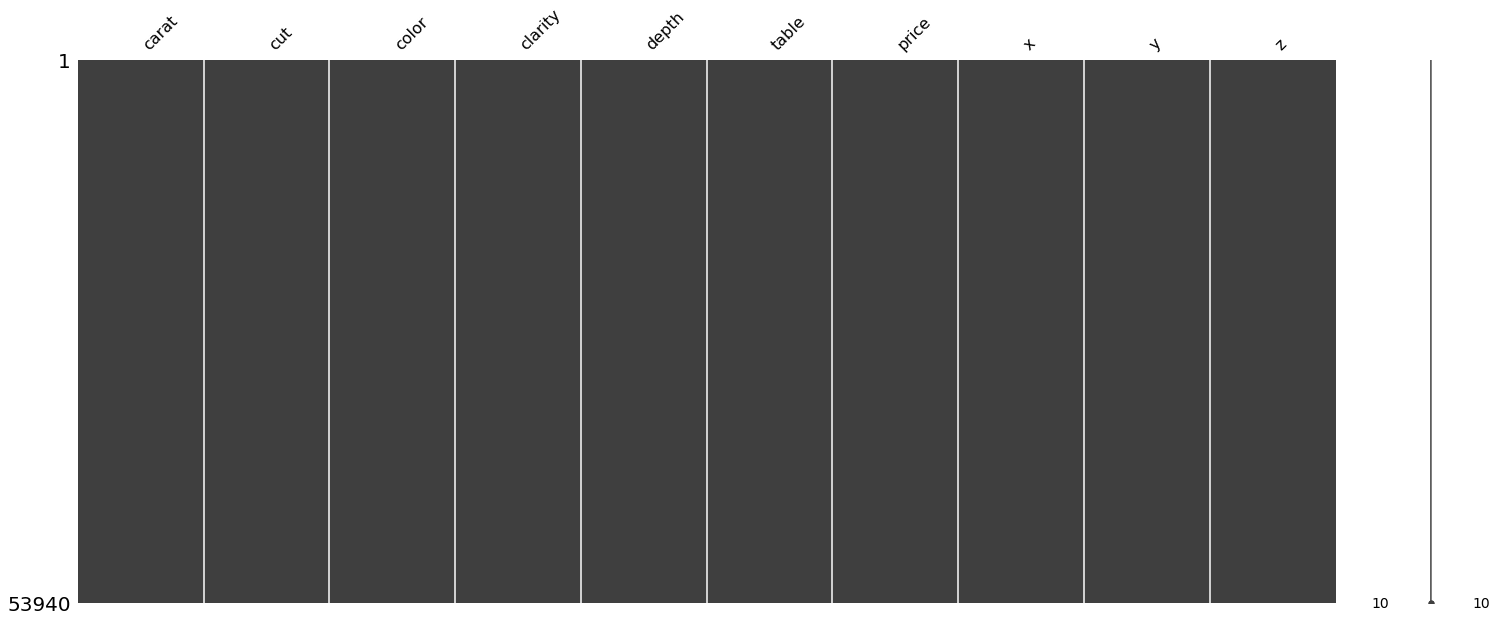

In [17]:
msn.matrix(df)

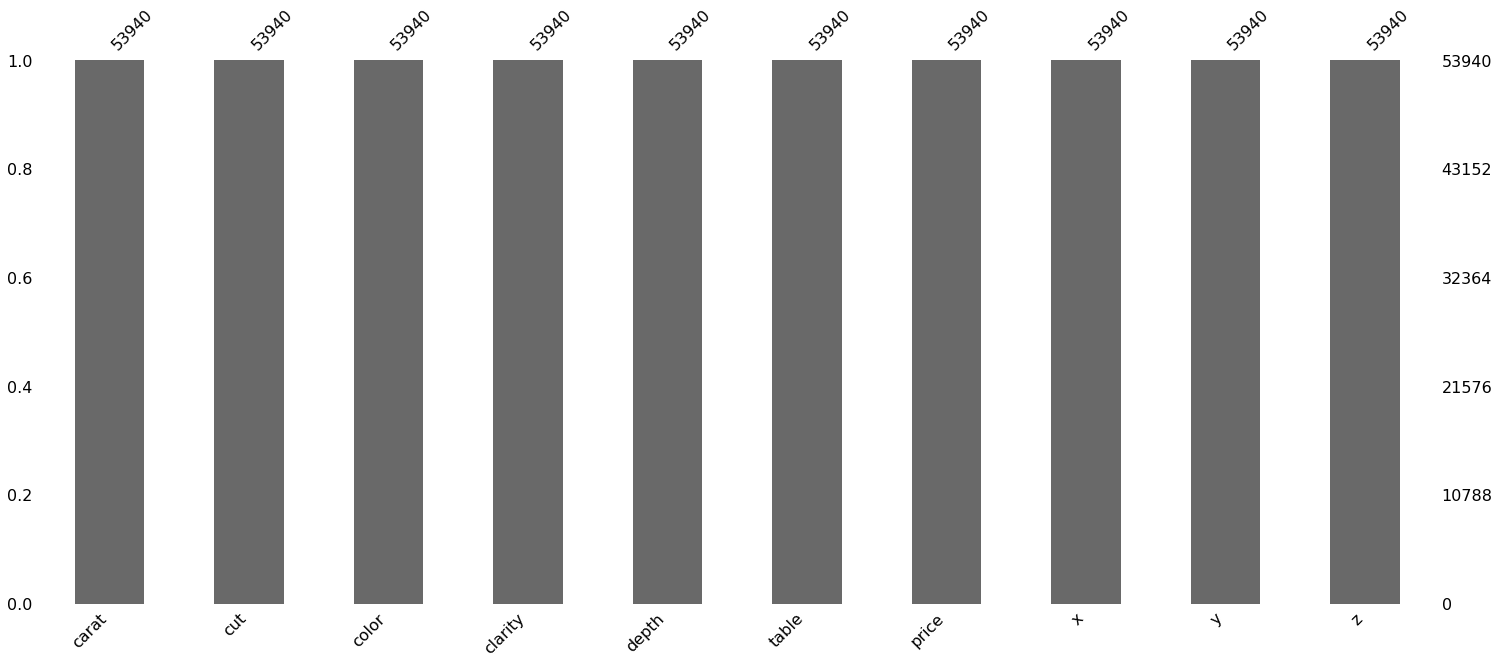

In [18]:
msn.bar(df)

In [20]:
numeric_cols=df._get_numeric_data().columns
categoric_cols=list(set(df.columns)-set(numeric_cols))

In [21]:
print(numeric_cols)


Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [26]:
print(categoric_cols)

['clarity', 'color', 'cut']


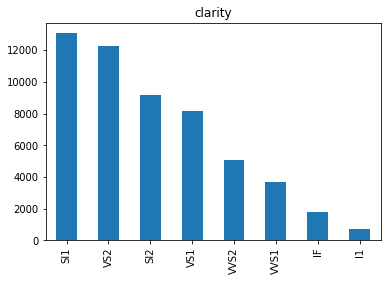

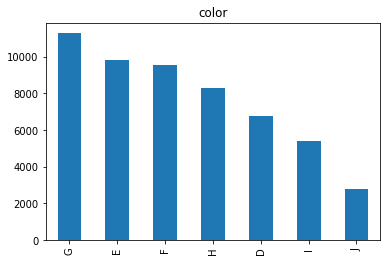

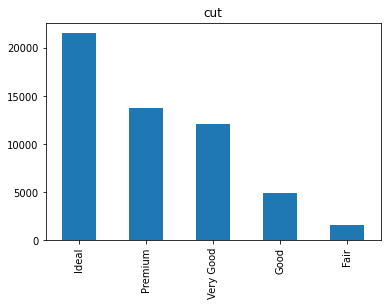

In [30]:
for col in categoric_cols:
    plt.title(col)
    df[col].value_counts().plot.bar()
    plt.show()

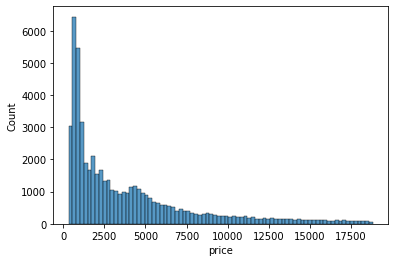

In [32]:
sns.histplot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


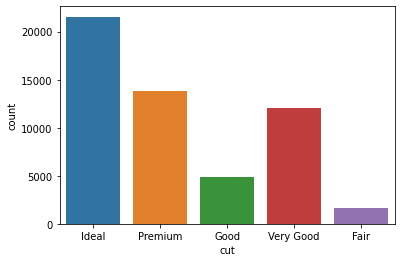

In [33]:
sns.countplot(df['cut'])

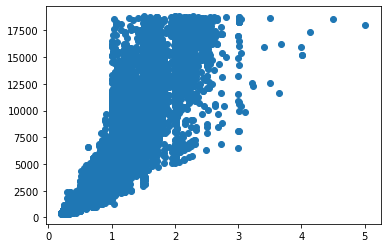

In [34]:
plt.scatter(df['carat'], df['price'])

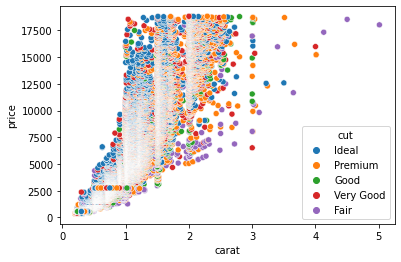

In [35]:
sns.scatterplot(x='carat', y='price', data=df, hue='cut')

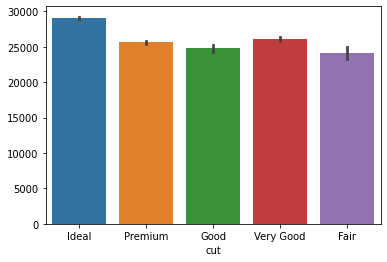

In [36]:
sns.barplot(x='cut', y=df.index, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


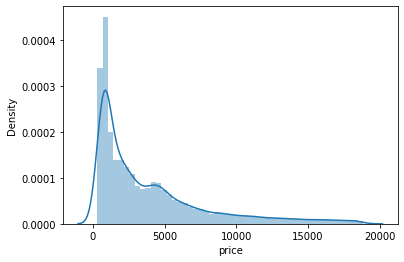

In [37]:
sns.distplot(df.price)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


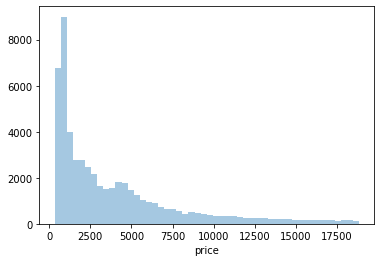

In [38]:
sns.distplot(df.price, kde=False)

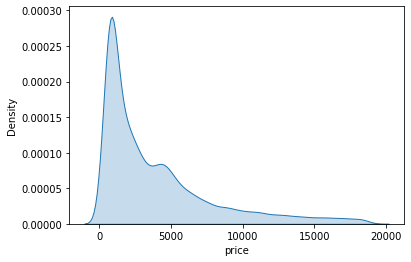

In [39]:
sns.kdeplot(df.price, shade=True)

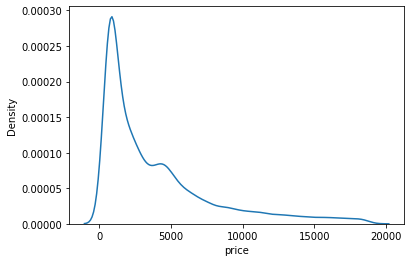

In [40]:
sns.kdeplot(df.price)

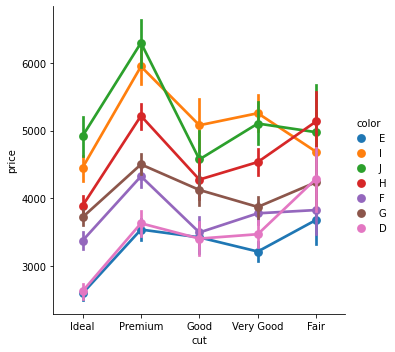

In [41]:
sns.catplot(x='cut', y='price', hue='color', kind='point', data=df)

In [42]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


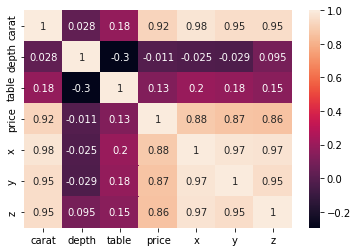

In [43]:
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


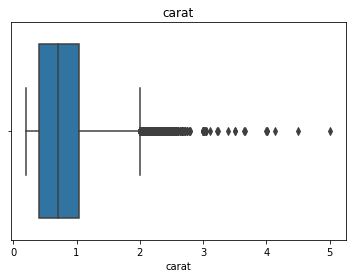

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


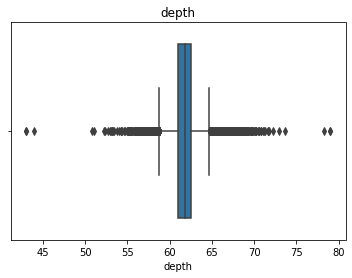

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


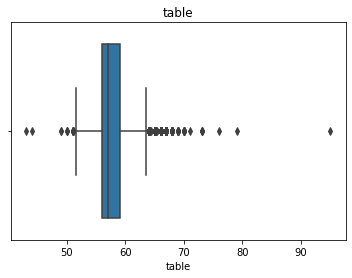

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


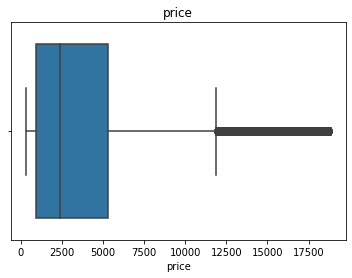

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


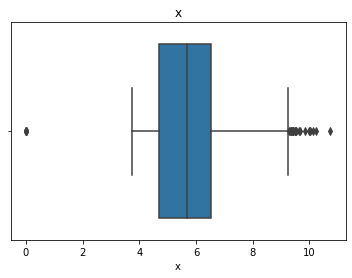

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


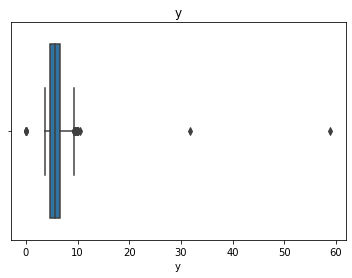

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


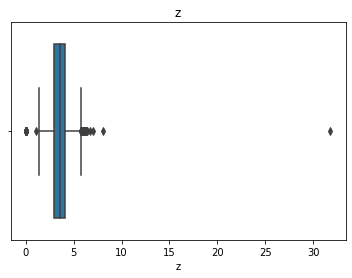

In [62]:
for col in numeric_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

# **Outliers**

In [63]:
def outliers(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df.loc[ df[col]<lower_bound, col]=lower_bound
    df.loc[ df[col]>upper_bound, col]=upper_bound
    return df

In [64]:
for col in numeric_cols:
    outliers(df, col)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


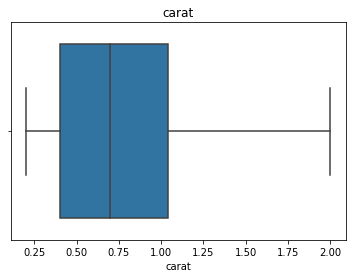

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


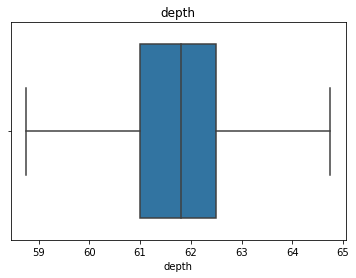

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


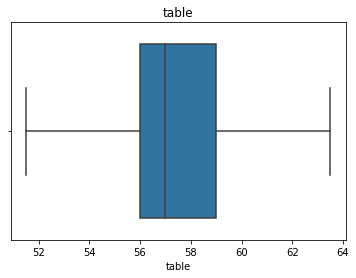

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


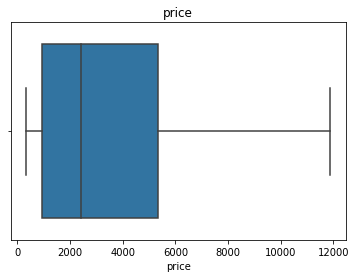

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


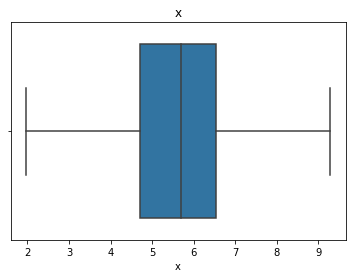

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


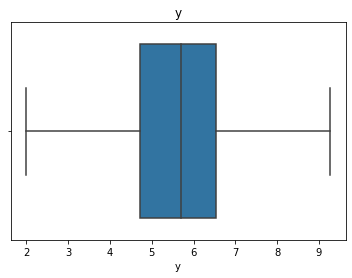

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


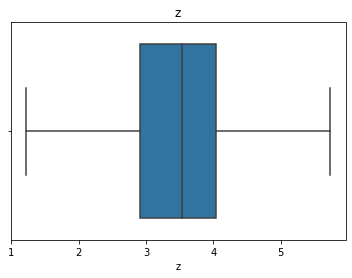

In [65]:
for col in numeric_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

## **One hot Encoding**

In [66]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,58.75,63.5,327.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.80,57.0,2757.0,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.10,55.0,2757.0,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.80,60.0,2757.0,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.00,58.0,2757.0,6.15,6.12,3.74


In [68]:
le=LabelEncoder()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,58.75,63.5,327.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.80,57.0,2757.0,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.10,55.0,2757.0,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.80,60.0,2757.0,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.00,58.0,2757.0,6.15,6.12,3.74


In [70]:
ohe=OneHotEncoder()
encoder=ohe.fit_transform(df[categoric_cols]).toarray()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,58.75,63.5,327.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.80,57.0,2757.0,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.10,55.0,2757.0,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.80,60.0,2757.0,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.00,58.0,2757.0,6.15,6.12,3.74


In [71]:
print(encoder)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [72]:
encoder=pd.DataFrame(encoder, index=df.index)

In [73]:
print(encoder)

        0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
1      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
5      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
53936  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
53937  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
53938  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
53939  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
53940  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

        14   15   16   17   18   19  
1      0.0  0

In [74]:
print(df)

       carat        cut color clarity  depth  table   price     x     y     z
1       0.23      Ideal     E     SI2  61.50   55.0   326.0  3.95  3.98  2.43
2       0.21    Premium     E     SI1  59.80   61.0   326.0  3.89  3.84  2.31
3       0.23       Good     E     VS1  58.75   63.5   327.0  4.05  4.07  2.31
4       0.29    Premium     I     VS2  62.40   58.0   334.0  4.20  4.23  2.63
5       0.31       Good     J     SI2  63.30   58.0   335.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53936   0.72      Ideal     D     SI1  60.80   57.0  2757.0  5.75  5.76  3.50
53937   0.72       Good     D     SI1  63.10   55.0  2757.0  5.69  5.75  3.61
53938   0.70  Very Good     D     SI1  62.80   60.0  2757.0  5.66  5.68  3.56
53939   0.86    Premium     H     SI2  61.00   58.0  2757.0  6.15  6.12  3.74
53940   0.75      Ideal     D     SI2  62.20   55.0  2757.0  5.83  5.87  3.64

[53940 rows x 10 columns]


In [75]:
df.drop(categoric_cols, axis=1, inplace=True)

In [76]:
df.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [77]:
data=pd.concat([df,encoder],axis=1)

In [79]:
data.head()

,carat,depth,table,price,x,y,z,0,1,2,...,10,11,12,13,14,15,16,17,18,19
1,0.23,61.50,55.0,326.0,3.95,3.98,2.43,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.21,59.80,61.0,326.0,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.23,58.75,63.5,327.0,4.05,4.07,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.29,62.40,58.0,334.0,4.20,4.23,2.63,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.31,63.30,58.0,335.0,4.34,4.35,2.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# **Machine Learning**

In [85]:
X=data.drop('price', axis=1)
Y=data['price']
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X, index=data.index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [89]:
Y.head()

1    326.0
2    326.0
3    327.0
4    334.0
5    335.0
Name: price, dtype: float64

In [105]:
def model_building(algo, X, Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=test_size, random_state=42)
    m=algo
    m.fit(X_train, Y_train)
    Y_train_pre=m.predict(X_train)
    Y_test_pre=m.predict(X_test)
    test_error=np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error=np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

In [106]:
cv={'model': [], 'train_error':[], 'test_error':[]}
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet()]

for model in models:
    res=model_building(model, X, Y)
    cv['model'].append(type(model).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[0])
    
res=pd.DataFrame(cv)

In [107]:
print(res)

              model  train_error   test_error
0  LinearRegression   842.094646   842.094646
1             Lasso   842.691373   842.691373
2             Ridge   842.095105   842.095105
3        ElasticNet  1166.609036  1166.609036


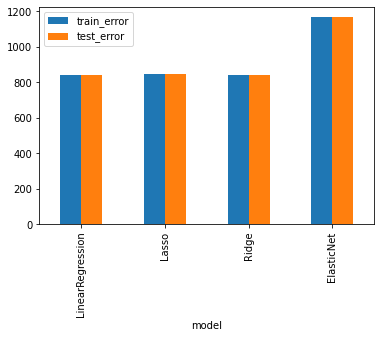

In [98]:
res.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.show()

# **Model Tuning**

In [112]:
def model_tuning(algo, algo_cv, X, Y, alphas, test_size=0.20, cv=10):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=test_size, random_state=42)
    m_cv=algo_cv(alphas=alphas, cv=cv)
    m_cv.fit(X_train, Y_train)
    print(m_cv)
    m=algo(m_cv.alpha_)
    m.fit(X_train, Y_train)
    Y_train_pre=m.predict(X_train)
    Y_test_pre=m.predict(X_test)
    test_error=np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error=np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

In [113]:
cv={'model': [], 'train_error':[], 'test_error':[]}
alphas=[0, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000]
models={Lasso: LassoCV, Ridge: RidgeCV, ElasticNet: ElasticNetCV}
for model in models:
    res=model_tuning(model, models[model], X, Y, alphas)
    cv['model'].append(type(models[model]()).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[1])
    
cv=pd.DataFrame(cv)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3770296111.7906094, tolerance: 46129103.840745255
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6047995403.523104, tolerance: 46129103.840745255
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6898056986.141523, tolerance: 46129103.840745255
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72770292

LassoCV(alphas=[0, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000], cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.834e+09, tolerance: 5.107e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


RidgeCV(alphas=array([0.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e+00, 1.e+01, 1.e+02,
       1.e+03]),
        cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13256505460.237165, tolerance: 46129103.840745255
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13750554812.411604, tolerance: 46129103.840745255
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13775362469.783997, tolerance: 46129103.840745255
  positive,
/usr/local/l

ElasticNetCV(alphas=[0, 0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000], cv=10)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+10, tolerance: 5.107e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [108]:
print(res)


              model  train_error   test_error
0  LinearRegression   842.094646   842.094646
1             Lasso   842.691373   842.691373
2             Ridge   842.095105   842.095105
3        ElasticNet  1166.609036  1166.609036


In [114]:
print(cv)

          model  train_error  test_error
0       LassoCV   842.109139  819.251440
1       RidgeCV   842.134063  819.276225
2  ElasticNetCV   842.099858  819.172237


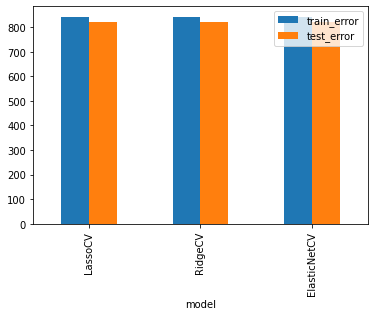

In [115]:
cv.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.show()